In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import requests

In [1]:
import proj_2025_sdm as ps
dir(ps)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'core',
 'main']

In [2]:
ps.main()

Hello from proj-2025-sdm!


In [2]:
import geopandas as gpd
from shapely.geometry import box

# Define the bounding box coordinates (min_lon, min_lat, max_lon, max_lat)
min_lon, min_lat, max_lon, max_lat = -25, 10, -10, 30

# Create a bounding box geometry
bounding_box = box(min_lon, min_lat, max_lon, max_lat)

# Create a GeoDataFrame and save it
#gdf = gpd.GeoDataFrame({'geometry': [bounding_box]})
#gdf.set_crs(epsg=4326, inplace=True)  # Set coordinate reference system
#gdf.to_file('~/proj_2025_sdm/contributors/fred/data/BoundingBox.shp')
#!pip install geopandas shapely


In [3]:
# Step 1: Load the region info
region_path = '~/proj_2025_sdm/contributors/fred/data/BoundingBox.shp'
extent_polygon = gpd.read_file(region_path)

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the downloaded shapefile (adjust the path to where you saved it)
world = gpd.read_file('~/proj_2025_sdm/contributors/fred/data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')



In [5]:
pip install pyobis

Note: you may need to restart the kernel to use updated packages.


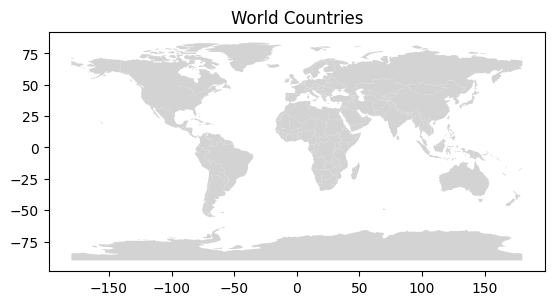

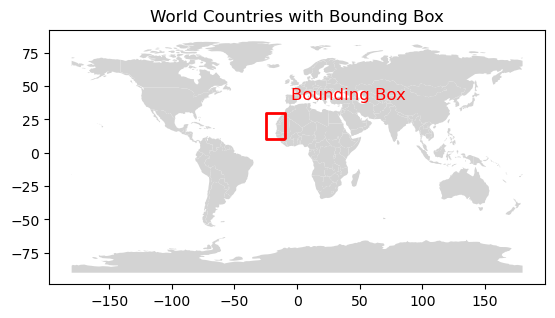

In [6]:
# Convert bounding box to GeoDataFrame
bbox_gdf = gpd.GeoDataFrame(geometry=[bounding_box], crs=world.crs)

# Plot the data
fig, ax = plt.subplots()
world.plot(ax=ax, color='lightgrey')
bbox_gdf.plot(ax=ax, color='none', edgecolor='red', linewidth=2)  # Plot the bounding box

# Add title and annotations
plt.title('World Countries with Bounding Box')
plt.annotate('Bounding Box', xy=(-5, 40), fontsize=12, color='red')  # Adjust coordinates as needed
plt.show()

In [7]:
# Step 3: Define turtle species
species = [
    "Sardinella aurita"
]

In [15]:
# Step 6: Get occurrence data from OBIS
import pyobis
def get_obis_data(species, geometry, size=None):
    search_kwargs = {
        "scientificname": species,
        "geometry": geometry,
    }
    if size is not None:
        search_kwargs["size"] = size

    response = occurrences.search(**search_kwargs)
    return response.all()  # gets all paginated results

In [11]:
data=occurrences.search(scientificname="Mola mola")


2025-08-04 17:38:42 - pyobis.obisutils - INFO - 23850 to be fetched. Estimated time =1.0597654402256012127 seconds


In [13]:
data["results"]

TypeError: 'OccResponse' object is not subscriptable

In [30]:
from pyobis import occurrences

def get_obis_data(species, geometry):
    df = occurrences.search(
        scientificname=species,
        geometry=geometry,
        size=10
    ).execute()
    return df  # already a DataFrame

In [ ]:
from pyobis import occurrences
data = occurrences.search(scientificname="Mola mola", size=10).execute()
occurrences.search(
    geometry="POLYGON((30.1 10.1, 10 20, 20 40, 40 40, 30.1 10.1))", size=20
)

In [23]:
from pyobis import occurrences
data = occurrences.search(scientificname="Mola mola", size=10).execute()


2025-08-04 17:24:07 - pyobis.obisutils - INFO - 10 to be fetched. Estimated time =1.09347674727439870 seconds
2025-08-04 17:24:07 - pyobis.obisutils - INFO - Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 10/10
2025-08-04 17:24:08 - pyobis.obisutils - INFO - Fetched 10 records.


In [29]:
occurrences.search(scientificname=species, size=10, geometry=geometry_wkt).execute()

2025-08-04 17:26:15 - pyobis.obisutils - INFO - 10 to be fetched. Estimated time =1.43228883385658270 seconds
2025-08-04 17:26:15 - pyobis.obisutils - INFO - Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 10/10
2025-08-04 17:26:15 - pyobis.obisutils - INFO - Fetched 10 records.


,basisOfRecord,brackish,catalogNumber,class,classid,collectionCode,continent,country,date_end,date_mid,...,eventTime,georeferenceRemarks,locality,maximumElevationInMeters,minimumElevationInMeters,month,occurrenceStatus,references,year,waterBody
0,humanobservation,True,FISH 1569441,Teleostei,293496,Occurrence,Africa,Guinea,-1.921536e+11,-1.921536e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,humanobservation,True,FISH 1704869,Teleostei,293496,Occurrence,Africa,Guinea,-1.776384e+11,-1.776384e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,humanobservation,True,FISH 1742353,Teleostei,293496,Occurrence,Africa,Senegal,-1.766016e+11,-1.766016e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,preservedspecimen,True,ISH 140-1964,Teleostei,293496,Occurrence,NaN,NaN,-1.835136e+11,-1.835136e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PreservedSpecimen,True,2001-0170,Teleostei,293496,IC,NaN,mauritanie,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Occurrence,True,diveboard:23836_1000279_0,Teleostei,293496,Diveboard,Atlantic Ocean,Spain,1.343866e+12,1.343866e+12,...,10:30:00,Derived from googlemaps Geographic datum = EPS...,"Charco Del Palo, Lanzarote",0.0,0.0,8,present,http://www.diveboard.com/ksso/D5oLK2v,2012,NaN
6,PreservedSpecimen,True,2000-5802,Teleostei,293496,IC,NaN,Mauritanie,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,atlantique
7,humanobservation,True,FISH 1708163,Teleostei,293496,Occurrence,Africa,Guinea,-1.920672e+11,-1.920672e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,humanobservation,True,FISH 1615935,Teleostei,293496,Occurrence,Africa,Senegal,-1.913760e+11,-1.913760e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,humanobservation,True,FISH 1650091,Teleostei,293496,Occurrence,Africa,Guinea,-1.777248e+11,-1.777248e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data

,basisOfRecord,brackish,class,classid,datasetName,date_end,date_mid,date_start,date_year,decimalLatitude,...,taxonID,associatedSequences,locality,materialSampleID,organismQuantity,organismQuantityType,recordedBy,sampleSizeUnit,sampleSizeValue,verbatimDepth
0,HumanObservation,False,Teleostei,293496,Sea Watch Foundation Marine Megafauna Sighting...,1.506211e+12,1.506211e+12,1.506211e+12,2017.0,58.637117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HumanObservation,False,Teleostei,293496,Digital Aerial Baseline Survey of Marine Wildl...,1.479341e+12,1.479341e+12,1.479341e+12,2016.0,39.331000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HumanObservation,False,Teleostei,293496,European Seabirds At Sea (ESAS),1.120176e+12,1.120176e+12,1.120176e+12,2005.0,37.785800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PreservedSpecimen,False,Teleostei,293496,AM,NaN,NaN,NaN,NaN,-31.000000,...,127405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HumanObservation,False,Teleostei,293496,Observatoire Pelagis aerial surveys 2002-2021,1.337818e+12,1.337818e+12,1.337818e+12,2012.0,43.100700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,HumanObservation,False,Teleostei,293496,BLM CETAP AIR Sightings,3.655584e+11,3.655584e+11,3.655584e+11,1981.0,40.167000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,HumanObservation,False,Teleostei,293496,NEFSC Right Whale Aerial Survey,1.466035e+12,1.466035e+12,1.466035e+12,2016.0,42.385490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MaterialSample,False,Teleostei,293496,NaN,1.630368e+12,1.629072e+12,1.627776e+12,2021.0,39.400361,...,OTU482,https://www.ncbi.nlm.nih.gov/bioproject/PRJNA1...,Berlengas Biosphere Reserve,https://www.ncbi.nlm.nih.gov/biosample/SAMN413...,23813,DNA sequence reads,Fisherman,DNA sequence reads,112123,30-50 m
8,HumanObservation,False,Teleostei,293496,BLM CETAP AIR Sightings,3.011040e+11,3.011040e+11,3.011040e+11,1979.0,39.733000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,HumanObservation,False,Teleostei,293496,Beacon Wind Digital Aerial Wildlife Surveys fo...,1.595290e+12,1.595290e+12,1.595290e+12,2020.0,40.968700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Fetch the data
geometry_wkt = f'POLYGON(({min_lon} {min_lat}, {max_lon} {min_lat}, {max_lon} {max_lat}, {min_lon} {max_lat}, {min_lon} {min_lat}))'  # WKT for bounding box
data = get_obis_data(species, geometry_wkt)
data

# Convert to DataFrame
#df = pd.DataFrame(data)


NameError: name 'min_lon' is not defined

In [10]:
#!pip install pyobis

In [8]:
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt
from pyobis import get_occurrences  # Correct import
import pandas as pd

# Step 1: Define the bounding box coordinates (min_lon, min_lat, max_lon, max_lat)
min_lon, min_lat, max_lon, max_lat = -25, 10, -10, 30

# Step 2: Create a bounding box geometry
bounding_box = box(min_lon, min_lat, max_lon, max_lat)

# Step 3: Convert bounding box to GeoDataFrame
bbox_gdf = gpd.GeoDataFrame(geometry=[bounding_box], crs="EPSG:4326")

# Step 4: Load the world countries shapefile
world_path = '~/proj_2025_sdm/contributors/fred/data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
world = gpd.read_file(world_path)

# Step 5: Define turtle species
species = [
    "Sardinella aurita"
]

# Step 6: Get occurrence data from OBIS
def get_obis_data(species, geometry):
    occurrences = get_occurrences(
        scientific_name=species,
        geometry=geometry
    )
    return occurrences

# Fetch the data
geometry_wkt = f'POLYGON(({min_lon} {min_lat}, {max_lon} {min_lat}, {max_lon} {max_lat}, {min_lon} {max_lat}, {min_lon} {min_lat}))'  # WKT for bounding box
data = get_obis_data(species, geometry_wkt)

# Convert to DataFrame
df = pd.DataFrame(data)

# Step 7: Plot the data
fig, ax = plt.subplots(figsize=(10, 8))  # Set figure size
world.plot(ax=ax, color='lightgrey')  # Plot world countries
bbox_gdf.plot(ax=ax, color='none', edgecolor='red', linewidth=2)  # Plot the bounding box

# Step 8: Plot the occurrences
if not df.empty:
    plt.scatter(df['decimalLongitude'], df['decimalLatitude'], color='blue', marker='o', alpha=0.6, label='OBIS Occurrences')

# Add title and annotations
plt.title('World Countries with Bounding Box and Turtle Occurrences', fontsize=15)
plt.annotate('Bounding Box', xy=(-17.5, 25), fontsize=12, color='red')  # Adjust coordinates as needed
plt.xlim(-30, 0)  # Set x limits to ensure the bounding box is visible
plt.ylim(0, 35)   # Set y limits to ensure the bounding box is visible
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()

ImportError: cannot import name 'get_occurrences' from 'pyobis' (/srv/conda/envs/notebook/lib/python3.11/site-packages/pyobis/__init__.py)

In [50]:
# Convert geometry to WKT
wkt_geometry = extent_polygon.geometry.to_wkt()

In [51]:
get_obis_data

<function __main__.get_obis_data(species, geometry)>

In [52]:
# Fetch data
obs = get_obis_data(species, "2000-01-01", wkt_geometry)

TypeError: get_obis_data() takes 2 positional arguments but 3 were given

In [ ]:
# Convert to DataFrame
obs_df = pd.DataFrame(obs['data'])

In [ ]:
# Step 5: Select relevant columns
cols_to_use = [
    "occurrenceID", "scientificName", "dateIdentified",
    "eventDate", "decimalLatitude", "decimalLongitude",
    "coordinateUncertaintyInMeters", "individualCount",
    "lifeStage", "sex", "bathymetry", "shoredistance", 
    "sst", "sss"
]

In [ ]:
# Filter the DataFrame to keep only the necessary columns
obs_df = obs_df[cols_to_use]

In [ ]:
# Step 6: Clean the date format
obs_df['date'] = pd.to_datetime(obs_df['eventDate']).dt.strftime('%Y-%m-%d')

In [ ]:
# Step 7: Save data
dir_data = 'data/raw-bio'
obs_csv = f"{dir_data}/io-sea-turtles.csv"
obs_geo = f"{dir_data}/io-sea-turtles.geojson"
obs_gpkg = f"{dir_data}/io-sea-turtles.gpkg"

In [ ]:
# Save to CSV
obs_df.to_csv(obs_csv, index=False)

In [ ]:
# Convert to GeoDataFrame for saving in spatial formats
obs_df['geometry'] = obs_df.apply(lambda row: Point(row['decimalLongitude'], row['decimalLatitude']), axis=1)
obs_gdf = gpd.GeoDataFrame(obs_df, geometry='geometry', crs="EPSG:4326")

In [ ]:
# Save to GeoJSON and GeoPackage
obs_gdf.to_file(obs_geo, driver='GeoJSON')
obs_gdf.to_file(obs_gpkg, driver='GPKG')

In [ ]:
# Step 8: Load and clean the data for analysis
io_turtles = pd.read_csv(obs_csv)

In [ ]:
# Subset for the species of interest
occ = io_turtles[io_turtles['scientificName'].isin(species)]

In [ ]:
# Filter occurrences in the water
occ = occ[(occ['bathymetry'] > 0) & 
           (occ['shoredistance'] > 0) & 
           (occ['coordinateUncertaintyInMeters'] < 200)]

In [ ]:
# Check the occurrence frequency
occ_counts = occ['scientificName'].value_counts()
print(occ_counts)

In [ ]:
# Step 9: Select needed columns and rename them
cols = [
    "scientificName", "eventDate", "decimalLatitude",
    "decimalLongitude", "lifeStage", "bathymetry", "sst", "sss"
]

In [ ]:
occ_sub = occ[cols]
occ_sub['eventDate'] = pd.to_datetime(occ_sub['eventDate'])

In [ ]:
# Rename columns
occ_sub.columns = ['sci.name', 'obsv.datetime', 'lat', 'lon', 'life.stage', 'bathy', 'SST', 'SSS']

In [ ]:
# Add common name column
occ_sub['common.name'] = occ_sub['sci.name'].map({
    "Caretta caretta": "Loggerhead",
    "Chelonia mydas": "Green"
})

In [ ]:
# Step 10: Save the cleaned data
cleaned_csv = f"{dir_data}/io-sea-turtles-clean.csv"
occ_sub.to_csv(cleaned_csv, index=False)

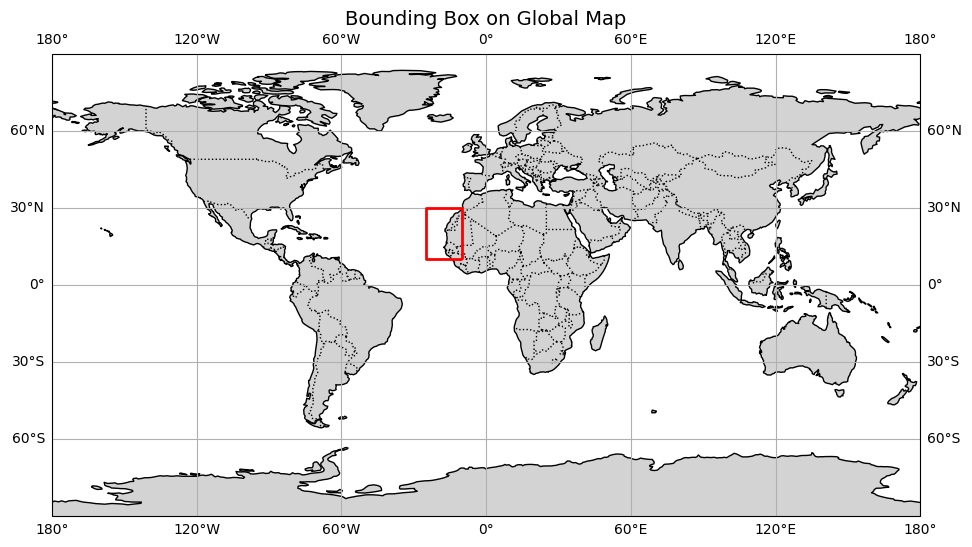

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import box
import geopandas as gpd

def plot_global_bbox(min_lon, min_lat, max_lon, max_lat):
    # Define the projection (Plate Carrée = equirectangular)
    proj = ccrs.PlateCarree()

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={"projection": proj})
    ax.set_global()

    # Add map features
    ax.coastlines()
    ax.add_feature(cfeature.LAND, facecolor="lightgray")
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.gridlines(draw_labels=True)

    # Create the bounding box
    bbox = box(min_lon, min_lat, max_lon, max_lat)
    bbox_gdf = gpd.GeoDataFrame(geometry=[bbox], crs="EPSG:4326")

    # Plot the bounding box
    bbox_gdf.boundary.plot(ax=ax, edgecolor="red", linewidth=2, transform=proj)

    # Optional annotation
    ax.set_title("Bounding Box on Global Map", fontsize=14)
    plt.show()

# Example usage
plot_global_bbox(-25, 10, -10, 30)
